# Project: Investigate a Dataset (TMDB MOVIE)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this analysis i choose imdb movie data which contains data of 10865 movies with thier id, imdb_id, popularity, budget	,revenue, original title, cast, homepage, director, tagline,overview,runtime,genres,production_companies,release_date,	vote_count,vote_average,release_year,budget_adj and	revenue_adj.
>In this analyis i will try to answer the follwing question
<p>Q1)Which directors has the highest profit.</p>
<p>Q2)Top 10 genres according to votes.</p>
<p>Q3)Which genre has heighest number of movie released.</p>
<p>Q4)COMPARISION BETWEEN  THE RATINGS OF PROFITABLE MOVIES AND NON-PROFITABLE MOVIES</p>

In [144]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.


### General Properties

In [52]:
df=df=pd.read_csv('tmdb-movies.csv')

In [53]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<h5>Check for duplicates and removing duplicates</h5>

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [55]:
sum(df.duplicated())

1

Only one duplicate so we can remove it 

In [56]:
df.drop_duplicates(inplace=True)


In [57]:
sum(df.duplicated())

0

<h4>Removing unwanted columns</h4>

In [58]:
df.drop(['homepage', 'cast', 'tagline', 'overview'],axis =1 ,inplace=True)

In [59]:
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


NOW we remove keywords and production compines as this contains a lot of null values 

In [61]:
df.drop(['production_companies','keywords'],axis=1,inplace=True)

In [62]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<p3> Now we remove NULL values</p3>

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [64]:
df.dropna(inplace=True)

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10795 entries, 0 to 10865
Data columns (total 15 columns):
id                10795 non-null int64
imdb_id           10795 non-null object
popularity        10795 non-null float64
budget            10795 non-null int64
revenue           10795 non-null int64
original_title    10795 non-null object
director          10795 non-null object
runtime           10795 non-null int64
genres            10795 non-null object
release_date      10795 non-null object
vote_count        10795 non-null int64
vote_average      10795 non-null float64
release_year      10795 non-null int64
budget_adj        10795 non-null float64
revenue_adj       10795 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [66]:
df.dtypes

id                  int64
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

Changing data type of release_date from object to datetime 

In [67]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [68]:
df.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [69]:
df.shape

(10795, 15)

<a id='eda'></a>
## Exploratory Data Analysis


## Q1)  Which director has the highest profit

In [70]:
df['profit']=df['revenue'] - df['budget']

In [71]:
df['profit'].head(5)

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

In [72]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


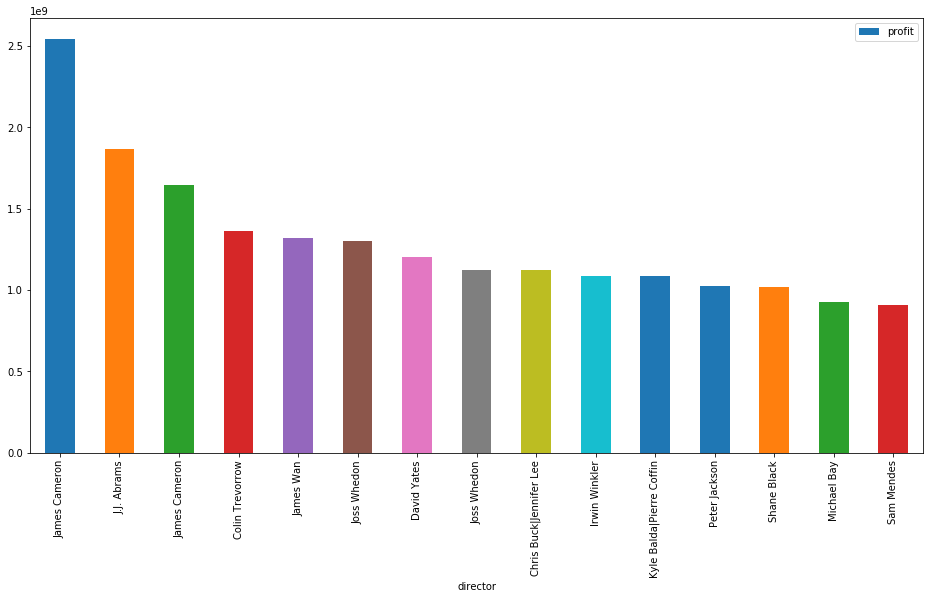

In [75]:

pro  = pd.DataFrame(df[['director', 'profit']].sort_values(by = 'profit', ascending = False))


pro[:15].plot(x ='director', y ='profit', kind = 'bar', figsize = (16,8) );

### Q2) Top 10 genres according to votes

In [134]:
df_gen1 = df.groupby(['genres'],as_index=False)[['vote_average']].mean().sort_values(by=['vote_average'],ascending=False)[:10]

In [135]:
df_gen1

,genres,vote_average
1149,Drama|Horror|Mystery|Science Fiction|Thriller,8.8
1589,Music|Drama|Fantasy|Romance,8.4
1907,Thriller|Documentary,8.2
1468,History|Drama|Thriller|War,8.0
1398,Fantasy|Drama|Crime,8.0
1666,Romance|Comedy|Animation|Drama|Family,8.0
1614,Mystery|Documentary|Crime,8.0
1353,Fantasy|Animation|Comedy|Drama,7.9
637,Animation|Drama|Fantasy,7.9
1743,Science Fiction|Adventure|Drama|Fantasy,7.9


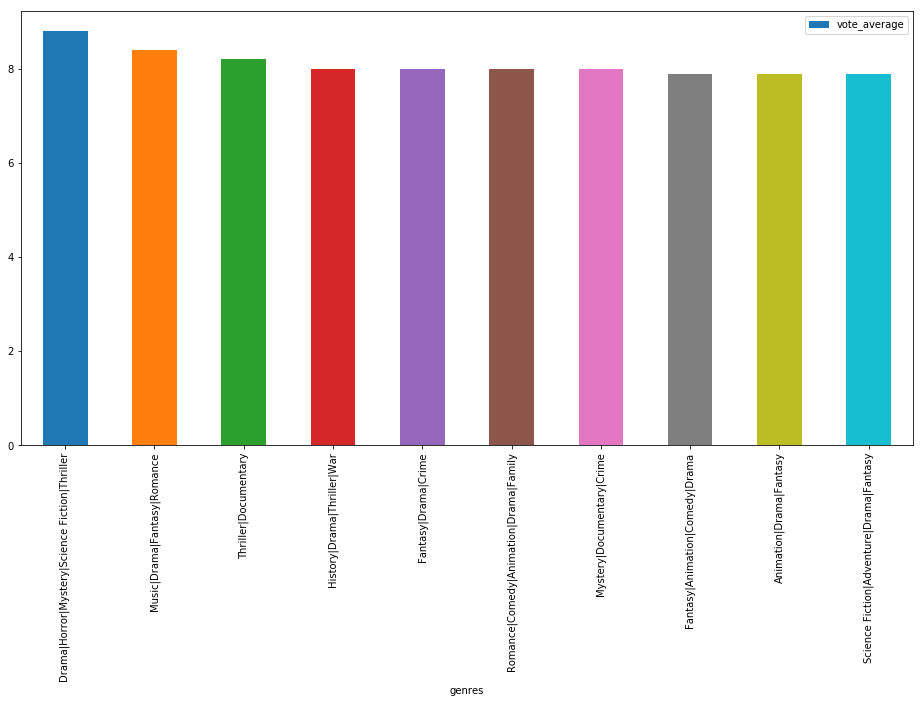

In [133]:
df_gen1[:10].plot(x ='genres', y ='vote_average', kind = 'bar', figsize = (16,8) );

### Q3) Which genre has heighest number of movie released

In [114]:
df2=df.groupby(['genres'])['id'].count().sort_values(ascending=False)[:10]


In [115]:
df2[:10]

genres
Drama                   711
Comedy                  707
Documentary             306
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          267
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: id, dtype: int64

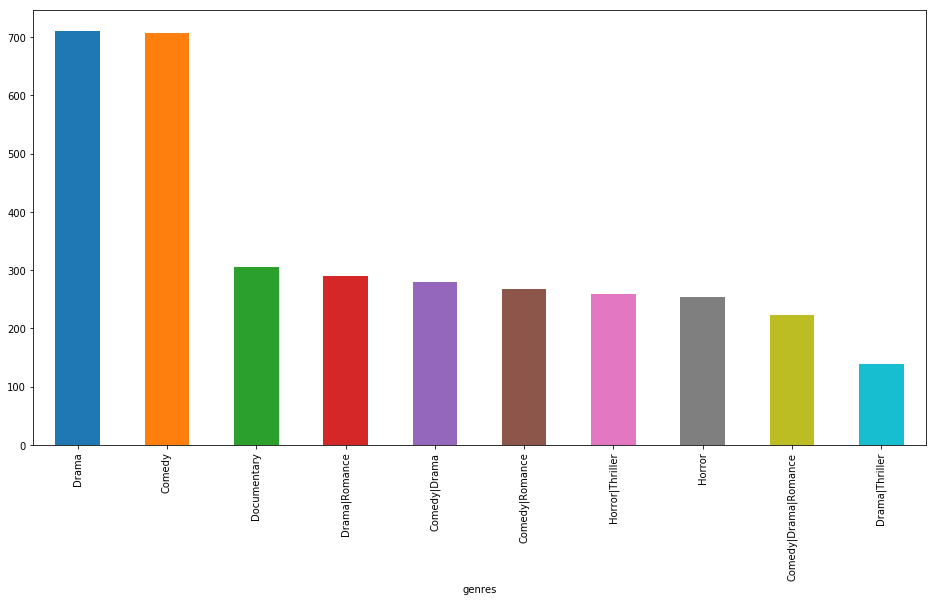

In [118]:
df2[:10].plot(x ='genres', y ='number of movies', kind = 'bar', figsize = (16,8) );

### Q4) COMPARISION BETWEEN  THE RATINGS OF PROFITABLE MOVIES AND NON-PROFITABLE MOVIES

In [123]:
hit=df.query('profit>0')
flop=df.query('profit<0')

In [124]:
avg_votes_high=hit['vote_average'].mean()

In [125]:
avg_votes_high

6.2358430540827143

In [126]:
avg_votes_flop=flop['vote_average'].mean()

In [136]:
avg_votes_flop

5.7283795130142741

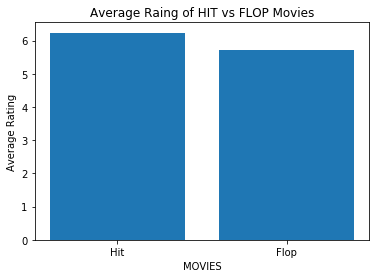

In [130]:
locations = [1, 2]
heights = [avg_votes_high, avg_votes_flop]
labels = ['Hit', 'Flop']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Raing of HIT vs FLOP Movies')
plt.xlabel('MOVIES')
plt.ylabel('Average Rating');

<a id='conclusions'></a>
## Conclusions

<p> Director james Cameron has heighest profit margin(2544505847).</p>
<p>Drama|Horror|Mystery|Science Fiction|Thriller	is the most rated genres with average rating of 8.8</p> 
<p>Comedy genre has heighest number of movie released i.e. 292 followed by comedy and documentry.</p>
<p>Profitable movies has better rating(6.23), as compared to non-profitable movies(5.7) .</p>




In [149]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


0